# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup


import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#print(cities)
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
city_data = []
print("Beginning Data Retrieval     ")
print("-----------------------------")

counter = 1
for city in cities:
    
    #Use URL plus name of city to connect to openweathermap.org's endpoint
    city_url = url + "&q=" + city
        #print each city
    print(f"Processing Record {counter} | {city}")
    
    counter = counter + 1
 # run API request inside try-catch and place data in json format
    try:
        #get data in json format
        city_weather = requests.get(city_url).json()
        
        # parse data and place values into variables that will be used for creating a df
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        #create dictionary using the data from openweathermap.org as the values
        city_data.append({"City": city,
                         "Lat": city_lat,
                         "lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    except:
        print(f"City {city} not found. Skipping to next city.")
    pass
    
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 | raudeberg
Processing Record 2 | sentyabrskiy
City sentyabrskiy not found. Skipping to next city.
Processing Record 3 | atuona
Processing Record 4 | hobart
Processing Record 5 | hovd
Processing Record 6 | saskylakh
Processing Record 7 | bluff
Processing Record 8 | bredasdorp
Processing Record 9 | kapaa
Processing Record 10 | ushuaia
Processing Record 11 | busselton
Processing Record 12 | jamestown
Processing Record 13 | russell
Processing Record 14 | celestun
Processing Record 15 | bandarbeyla
Processing Record 16 | rikitea
Processing Record 17 | port alfred
Processing Record 18 | castro
Processing Record 19 | alofi
Processing Record 20 | gwanda
Processing Record 21 | banjar
Processing Record 22 | mehamn
Processing Record 23 | papetoai
Processing Record 24 | grand river south east
City grand river south east not found. Skipping to next city.
Processing Record 25 | caravelas
Processing Record 26 | cherskiy


Processing Record 214 | stendal
Processing Record 215 | mantua
Processing Record 216 | tuktoyaktuk
Processing Record 217 | olafsvik
City olafsvik not found. Skipping to next city.
Processing Record 218 | necochea
Processing Record 219 | puerto leguizamo
Processing Record 220 | broome
Processing Record 221 | kasongo-lunda
Processing Record 222 | kupang
Processing Record 223 | matay
Processing Record 224 | inta
Processing Record 225 | toliary
City toliary not found. Skipping to next city.
Processing Record 226 | auki
Processing Record 227 | saint-francois
Processing Record 228 | hirara
Processing Record 229 | acapulco
Processing Record 230 | henties bay
Processing Record 231 | dikson
Processing Record 232 | tezu
Processing Record 233 | balimo
City balimo not found. Skipping to next city.
Processing Record 234 | gamba
Processing Record 235 | port lincoln
Processing Record 236 | santa maria
Processing Record 237 | ribeira grande
Processing Record 238 | ponta delgada
Processing Record 239 |

Processing Record 429 | ahuimanu
Processing Record 430 | angra
City angra not found. Skipping to next city.
Processing Record 431 | krasnodon
Processing Record 432 | fort saint john
City fort saint john not found. Skipping to next city.
Processing Record 433 | yarmouth
Processing Record 434 | cochrane
Processing Record 435 | meulaboh
Processing Record 436 | horodnya
Processing Record 437 | port hueneme
Processing Record 438 | maningrida
Processing Record 439 | marsabit
Processing Record 440 | khomeynishahr
City khomeynishahr not found. Skipping to next city.
Processing Record 441 | kamenskoye
City kamenskoye not found. Skipping to next city.
Processing Record 442 | yelan
Processing Record 443 | tyup
Processing Record 444 | scarborough
Processing Record 445 | lasa
Processing Record 446 | wanaka
Processing Record 447 | longyearbyen
Processing Record 448 | morehead
Processing Record 449 | mahaicony
City mahaicony not found. Skipping to next city.
Processing Record 450 | guarapari
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data_pd = pd.DataFrame(city_data)

In [6]:
city_data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 9 columns):
City          540 non-null object
Cloudiness    540 non-null int64
Country       540 non-null object
Date          540 non-null int64
Humidity      540 non-null int64
Lat           540 non-null float64
Max Temp      540 non-null float64
Wind Speed    540 non-null float64
lng           540 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 38.0+ KB


In [8]:
city_data_pd.to_csv("output_data.csv", index=False)


In [9]:
# ### Plotting the Data
# * Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
# * Save the plotted figures as .pngs.

In [10]:
#### Latitude vs. Temperature Plot

In [11]:
cities = city_data_pd.groupby(['City'])

In [12]:
CitybyLat=cities['Lat'].max()
CitybyLat.head()

City
abu dhabi    24.47
acapulco     16.86
adre         13.47
ahipara     -35.17
ahuimanu     21.44
Name: Lat, dtype: float64

In [13]:
tempbylat=cities['Max Temp'].mean()
tempbylat.head()

City
abu dhabi    73.40
acapulco     86.00
adre         76.25
ahipara      64.99
ahuimanu     80.60
Name: Max Temp, dtype: float64

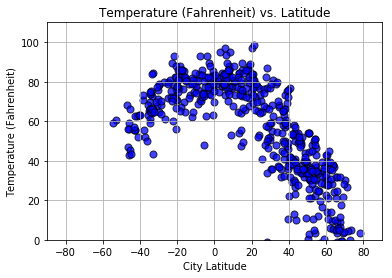

In [14]:
TempbyLatitude=plt.scatter(CitybyLat, tempbylat, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)

# The y limits of our scatter plot is 0 to 1
plt.ylim(0, 110)

# The x limits of our scatter plot is 0 to 100
plt.xlim(-90,90)
plt.title("Temperature (Fahrenheit) vs. Latitude")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("City Latitude")
plt.savefig("../Images/TempvsLat.png")
plt.grid()
plt.show()


#### Latitude vs. Humidity Plot

In [15]:
HumbyLat=cities['Humidity'].max()
HumbyLat.head()

City
abu dhabi     43
acapulco      58
adre          16
ahipara      100
ahuimanu      54
Name: Humidity, dtype: int64

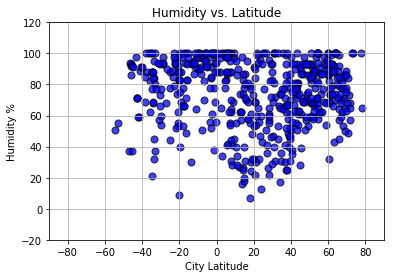

In [16]:
HumitidybyLatitude=plt.scatter(CitybyLat, HumbyLat, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)

# The y limits of our scatter plot is 0 to 1
plt.ylim(-20, 120)

# The x limits of our scatter plot is 0 to 100
plt.xlim(-90,90)
plt.title("Humidity vs. Latitude")
plt.ylabel("Humidity %")
plt.xlabel("City Latitude")
plt.savefig("../Images/HumvsLat.png")
plt.grid()
plt.show()


#### Latitude vs. Cloudiness Plot

In [17]:
CloudbyLat=cities['Cloudiness'].max()
CloudbyLat.head()

City
abu dhabi     0
acapulco      5
adre         12
ahipara      80
ahuimanu     40
Name: Cloudiness, dtype: int64

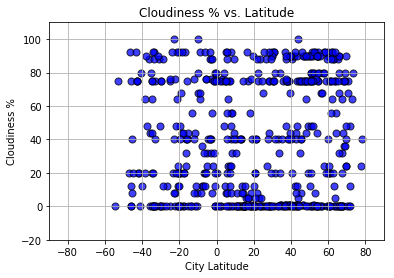

In [18]:
CloudinessbyLatitude=plt.scatter(CitybyLat, CloudbyLat, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)

# The y limits of our scatter plot is 0 to 1
plt.ylim(-20, 110)

# The x limits of our scatter plot is 0 to 100
plt.xlim(-90,90)
plt.title("Cloudiness % vs. Latitude")
plt.ylabel("Cloudiness %")
plt.xlabel("City Latitude")
plt.savefig("../Images/CloudvsLat.png")
plt.grid()
plt.show()


####Wind Speed (mph) vs. Latitude

In [19]:
WindbyLat=cities['Wind Speed'].max()
WindbyLat.head()

City
abu dhabi     5.82
acapulco      8.05
adre         12.59
ahipara       7.23
ahuimanu     12.75
Name: Wind Speed, dtype: float64

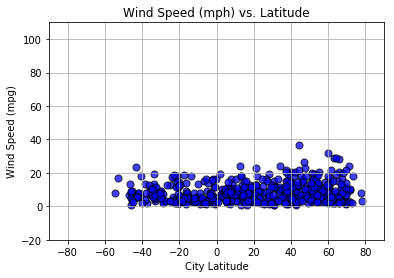

In [21]:
WindSpeedbyLatitude=plt.scatter(CitybyLat, WindbyLat, marker="o", facecolors="blue", edgecolors="black",
            s=50, alpha=0.75)

# The y limits of our scatter plot is 0 to 1
plt.ylim(-20, 110)

# The x limits of our scatter plot is 0 to 100
plt.xlim(-90,90)
plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mpg)")
plt.xlabel("City Latitude")
plt.savefig("../Images/WindvsLat.png")
plt.grid()
plt.show()
